In [1]:
import csv
import pandas as pd 

import numpy as np
import matplotlib.pyplot as plt

from scipy.fftpack import fft,fftfreq,fftshift
import pywt


In [2]:
# 開啟 CSV 檔案
csvpath = 'data/Hare_Lynx.csv'
with open(csvpath , newline='') as csvfile:

  # 讀取 CSV 檔案內容
  rows = csv.reader(csvfile)

  # 以迴圈輸出每一列
  for row in rows:
    print(row)

['time (year)', ' hare', ' lynx']
['1845', '28000', '546']
['1846', '25000', '1033']
['1847', '25000', '2129']
['1848', '25000', '2536']
['1849', '12000', '957']
['1850', '26000', '361']
['1851', '53000', '377']
['1852', '80000', '225']
['1853', '80000', '360']
['1854', '90000', '731']
['1855', '69000', '1638']
['1856', '81000', '2725']
['1857', '95000', '2871']
['1858', '71000', '2119']
['1859', '28000', '684']
['1860', '18000', '299']
['1861', '19000', '236']
['1862', '40000', '245']
['1863', '5000', '552']
['1864', '152000', '1623']
['1865', '145000', '3311']
['1866', '105000', '6721']
['1867', '45000', '4245']
['1868', '22000', '687']
['1869', '2000', '255']
['1870', '3000', '473']
['1871', '8000', '358']
['1872', '7000', '784']
['1873', '62000', '1594']
['1874', '50000', '1676']
['1875', '51000', '2251']
['1876', '105000', '1426']
['1877', '88000', '756']
['1878', '64000', '299']
['1879', '19000', '201']
['1880', '10000', '229']
['1881', '16000', '469']
['1882', '15000', '736']
['

In [4]:
data = pd.read_csv(csvpath) 
data.head()


,time (year),hare,lynx
0,1845,28000,546
1,1846,25000,1033
2,1847,25000,2129
3,1848,25000,2536
4,1849,12000,957


In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
time = data.iloc[:,0].values.squeeze()
hare =  data.iloc[:,1].values.squeeze()
lynx =  data.iloc[:,2].values.squeeze()


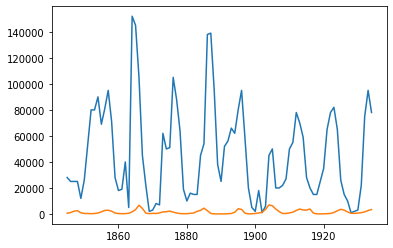

In [7]:
plt.plot(time,hare,time,lynx )


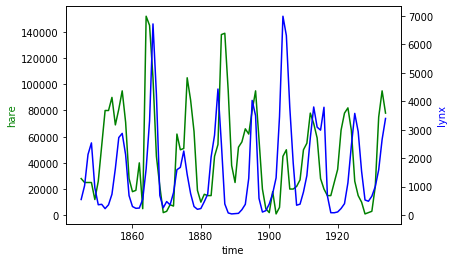

In [8]:
#上圖數量差距很大，two y axis

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(time, hare, 'g-')
ax2.plot(time, lynx, 'b-')

ax1.set_xlabel('time')
ax1.set_ylabel('hare', color='g')
ax2.set_ylabel('lynx', color='b')

plt.show()

In [9]:
len(data)

90

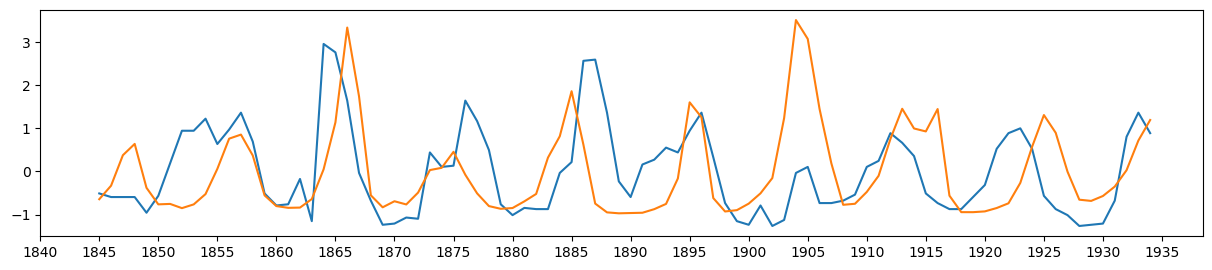

In [108]:
#正規化處理
#hare_norm = (hare - np.mean(hare) )/np.std(hare)
#lynx_norm = (lynx - np.mean(lynx) )/np.std(lynx)

hare_norm = (hare - np.min(hare))/(np.max(hare) - np.min(hare))

plt.figure(figsize=(15,3),dpi=100)
plt.plot(time,hare_norm,time,lynx_norm)
plt.xticks(np.arange(1840, 1940, 5)) 

plt.show()


# Fourier Transform


In [78]:
#一年一筆資料，代表一年採樣1個點
fs = 1
num_samples = len(data)


In [112]:

sig = hare_norm
#sig = lynx_norm

In [113]:
1.0/f_values[1:]

array([45.        , 30.        , 22.5       , 18.        , 15.        ,
       12.85714286, 11.25      , 10.        ,  9.        ,  8.18181818,
        7.5       ,  6.92307692,  6.42857143,  6.        ,  5.625     ,
        5.29411765,  5.        ,  4.73684211,  4.5       ,  4.28571429,
        4.09090909,  3.91304348,  3.75      ,  3.6       ,  3.46153846,
        3.33333333,  3.21428571,  3.10344828,  3.        ,  2.90322581,
        2.8125    ,  2.72727273,  2.64705882,  2.57142857,  2.5       ,
        2.43243243,  2.36842105,  2.30769231,  2.25      ,  2.19512195,
        2.14285714,  2.09302326,  2.04545455])

In [114]:
len(fft_values)

44

In [115]:
fft_values

array([ 8.38502833, 12.88529459,  8.51473765, 13.41037931,  7.68591293,
        5.85347354,  3.25942706, 12.03699559, 42.80241834, 18.99183238,
       10.72712708, 12.87463248,  7.45560173,  6.72672281,  8.41043187,
        4.86841938,  5.29771941,  9.79047025, 12.43896084,  5.16300873,
        9.53876197,  4.79989268,  2.48840613,  7.10296128,  3.58811346,
        2.98226581,  2.65298555,  4.45674777,  5.15257364,  3.01393889,
        5.25051165,  0.20150902,  3.38202127,  1.3001129 ,  2.30649139,
        2.50591243,  1.77340299,  1.70837037,  1.59807045,  3.01296862,
        1.88430784,  0.74478209,  1.601305  ,  2.28948084])

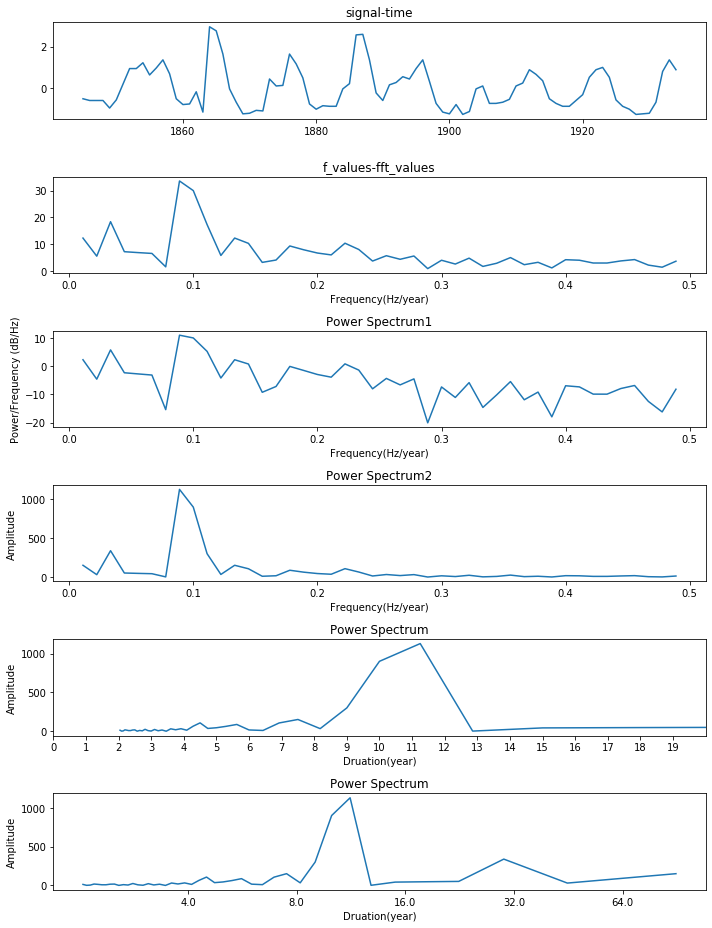

In [116]:
#繪圖

#進行頻譜分析
#fftfreq 第一個引數n是FFT的點數，一般取FFT之後的資料的長度（size）
#        第二個引數d是取樣週期，其倒數就是取樣頻率fs，即d=1/fs

#fftshift用來調整順序，讓資料平移以原點為中心
f_values = fftshift(fftfreq( num_samples, 1/fs))
x = fftshift( fft(sig) )

fft_values = abs(x)
#因計算出來的是對稱的，故只取一半顯示
f_values = f_values[ int(num_samples/2) :]
fft_values = fft_values[ int(num_samples/2) :]


#去除直流成分，f_values第一個數字是0
f_values = f_values[1:]
fft_values = fft_values[1:]

'''
計算Power Spectrum Density
兩種算法
第一種是從matlab的資料
https://www.mathworks.com/help/signal/ug/power-spectral-density-estimates-using-fft.html

再用10*log10(fft_power1)算dB
算出來是Power/Frequency (dB/Hz)

第二種算法
是variance * magnitude
'''
fft_power1 = (1.0/(fs*num_samples)) * abs(fft_values) ** 2

variance = np.std(sig)**2
fft_power2 = variance * abs(fft_values) ** 2




#繪圖
fig, axes = plt.subplots(6, 1, figsize=(10,13))
axes[0].plot(time , sig)
axes[0].set_title('signal-time')

axes[1].plot(f_values , fft_values)
axes[1].set_title('f_values-fft_values')
axes[1].set_xlabel('Frequency(Hz/year)')

axes[2].plot(f_values , 10*np.log10(fft_power1))
axes[2].set_title('Power Spectrum1')
axes[2].set_xlabel('Frequency(Hz/year)')
axes[2].set_ylabel('Power/Frequency (dB/Hz)')

axes[3].plot(f_values , fft_power2)
axes[3].set_title('Power Spectrum2')
axes[3].set_xlabel('Frequency(Hz/year)')
axes[3].set_ylabel('Amplitude')

axes[4].plot((1.0/f_values) , fft_power2)
axes[4].set_title('Power Spectrum')
axes[4].set_xlabel('Druation(year)')
axes[4].set_ylabel('Amplitude')
axes[4].set_xlim(0,20)
axes[4].set_xticks(np.arange(0,20,1))



period = 1.0/f_values

axes[5].plot(np.log2(period) , fft_power2)
axes[5].set_title('Power Spectrum')
axes[5].set_xlabel('Druation(year)')
axes[5].set_ylabel('Amplitude')

xticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
axes[5].set_xticks(np.log2(xticks))
axes[5].set_xticklabels(xticks)



fig.tight_layout()

plt.show()


# 進行wavelet分析

In [117]:
#小波分析
wavename = 'cmor1.5-1.0'
scales = np.arange(1, 16)
cwtmatr, freqs = pywt.cwt(sig, scales, wavename, 1/fs)

power = (abs(cwtmatr)) ** 2
period = 1. / freqs    #週期是頻率的倒數

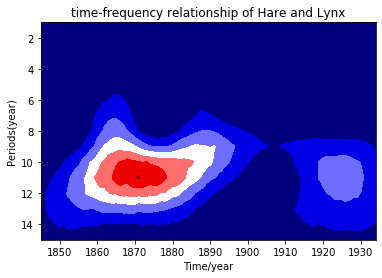

In [118]:
plt.contourf(time, period, power,cmap=plt.cm.seismic)
plt.title('time-frequency relationship of Hare and Lynx')
plt.xlabel('Time/year')
plt.ylabel('Periods(year)')
plt.gca().invert_yaxis()

plt.show()

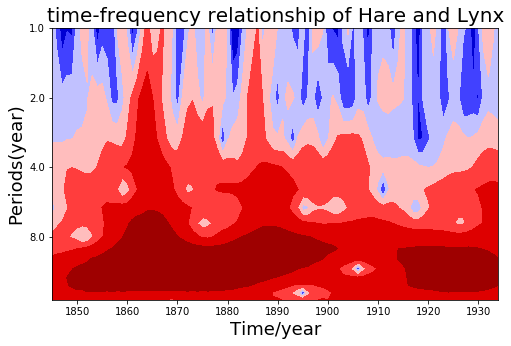

In [119]:
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
contourlevels = np.log2(levels)

fig, ax = plt.subplots(figsize=(8, 5))
im = ax.contourf(time, np.log2(period), np.log2(power), cmap=plt.cm.seismic)
title = 'time-frequency relationship of Hare and Lynx'
ylabel = 'Periods(year)'
xlabel = 'Time/year'

ax.set_title(title, fontsize=20)
ax.set_ylabel(ylabel, fontsize=18)
ax.set_xlabel(xlabel, fontsize=18)

yticks = 2**np.arange( np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())) )
ax.set_yticks(np.log2(yticks))
ax.set_yticklabels(yticks)
ax.invert_yaxis()   
ylim = ax.get_ylim()

plt.show()